In [12]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install requests

  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/25/ba/fb6d43cbc05269b3e3f6c811b33307e2a31bb893287bda9407996e4fe969/charset_normalizer-3.3.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Obtaining dependency information for urllib3<3,>=1.21.1 from https://files.pythonhosted.org/packages/d2/b2/b157855192a68541a91ba7b2bbcb91f1b4faa51f8bae38d8005c034be524/urllib3-2.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for certifi>=2017.4.17 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.m

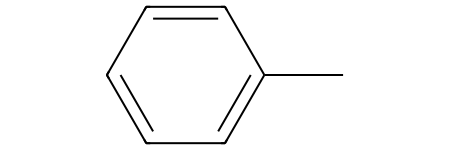

In [5]:
from rdkit import Chem

m = Chem.MolFromSmiles('Cc1ccccc1')
m

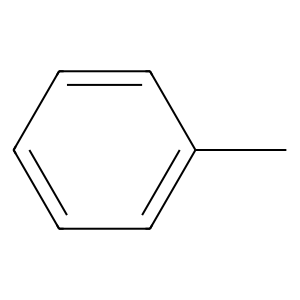

In [6]:
from rdkit.Chem import Draw
img = Draw.MolToImage(m)
img

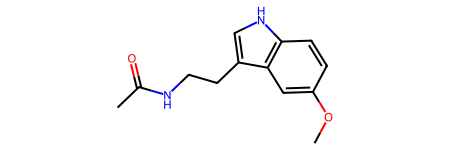

In [8]:
""" molecula de melatonina """
m = Chem.MolFromSmiles('CC(=O)NCCC1=CNc2c1cc(OC)cc2')
m

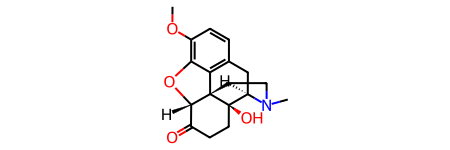

In [15]:
""" oxycodone from https://go.drugbank.com/drugs/DB00497 """
""" import as a MOL FORMAT """

import requests

oxycodone_url = 'https://go.drugbank.com/structures/small_molecule_drugs/DB00497.mol'
oxycodone_mol = requests.get('https://go.drugbank.com/structures/small_molecule_drugs/DB00497.mol').text

oxycodone = Chem.MolFromMolBlock(oxycodone_mol)
oxycodone

In [16]:
oxycodone.GetNumAtoms()

23

In [18]:
""" list comprehensions for operations with molecules"""

[atom.GetSymbol() for atom in oxycodone.GetAtoms() if not atom.IsInRing()]

['O', 'O', 'C', 'O', 'C']

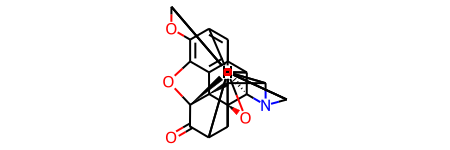

In [21]:
""" agregar labels donde estan los hidrogenos """
oxycodone_with_hydrogens = Chem.AddHs(oxycodone)
oxycodone_with_hydrogens

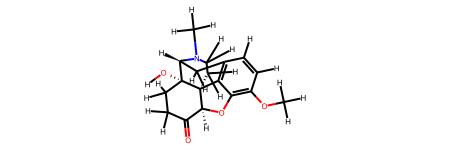

In [25]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(oxycodone_with_hydrogens)
oxycodone_with_hydrogens

In [26]:
""" descriptors """
from rdkit.Chem import Descriptors
Descriptors.MolWt(oxycodone)

315.369

In [27]:
""" una medida que solo se puede obtener en labs """
Descriptors.MolLogP(oxycodone)

1.0481999999999996

In [28]:
Descriptors.NumRotatableBonds(oxycodone)

1

Curso 2